In [1]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import rioxarray as rxr 
from rasterio.plot import plotting_extent
import geopandas as gpd
import rasterstats as rs 
from earthpy import spatial as es 
import earthpy as et 
import earthpy.plot as ep 

sns.set_style("white")
sns.axes_style("white")
sns.set(font_scale=1.5)

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [2]:
sjer_lidar_chm_path = os.path.join("spatial-vector-lidar", "california", "neon-sjer-site", "2013", "lidar", "SJER_lidarCHM.tif")

sjer_chm_data = rxr.open_rasterio(sjer_lidar_chm_path, masked=True).squeeze() 


plot_buffer_path = os.path.join("spatial-vector-lidar", "outputs", "plot_buffer.shp")

sjer_tree_heights = rs.zonal_stats(plot_buffer_path, sjer_chm_data.values, affine=sjer_chm_data.rio.transform(), geojson_out=True, copy_properties=True, nodata=0, stats="count mean max")

sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)

sjer_lidar_height_df.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,max,mean,count
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17


In [3]:
path_insitu = os.path.join("spatial-vector-lidar", "california", "neon-sjer-site", "2013", "insitu", "veg_structure", "D17_2013_SJER_vegStr.csv")

sjer_insitu_all = pd.read_csv(path_insitu)

sjer_insitu_all.columns

Index(['siteid', 'sitename', 'plotid', 'easting', 'northing', 'taxonid',
       'scientificname', 'indvidual_id', 'pointid', 'individualdistance',
       'individualazimuth', 'dbh', 'dbhheight', 'basalcanopydiam',
       'basalcanopydiam_90deg', 'maxcanopydiam', 'canopydiam_90deg',
       'stemheight', 'stemremarks', 'stemstatus', 'canopyform', 'livingcanopy',
       'inplotcanopy', 'materialsampleid', 'dbhqf', 'stemmapqf', 'plant_group',
       'common_name', 'aop_plot', 'unique_id'],
      dtype='object')

In [4]:
sjer_insitu_all.head()

,siteid,sitename,plotid,easting,northing,taxonid,scientificname,indvidual_id,pointid,individualdistance,...,canopyform,livingcanopy,inplotcanopy,materialsampleid,dbhqf,stemmapqf,plant_group,common_name,aop_plot,unique_id
0,SJER,San Joaquin,SJER128,257085.7,4111381.5,PISA2,Pinus sabiniana,1485,center,9.7,...,NaN,100,100,NaN,0,0,NaN,NaN,NaN,NaN
1,SJER,San Joaquin,SJER2796,256047.7,4111548.5,ARVI4,Arctostaphylos viscida,1622,NE,5.8,...,Hemisphere,70,100,f095,0,0,NaN,NaN,NaN,NaN
2,SJER,San Joaquin,SJER272,256722.9,4112170.2,ARVI4,Arctostaphylos viscida,1427,center,6.0,...,Hemisphere,35,100,NaN,0,0,NaN,NaN,NaN,NaN
3,SJER,San Joaquin,SJER112,257421.4,4111308.2,ARVI4,Arctostaphylos viscida,1511,center,17.2,...,Sphere,70,100,f035,0,0,NaN,NaN,NaN,NaN
4,SJER,San Joaquin,SJER272,256720.5,4112177.2,ARVI4,Arctostaphylos viscida,1431,center,9.9,...,Sphere,80,100,f087,0,0,NaN,NaN,NaN,NaN


In [5]:
sjer_insitu = sjer_insitu_all[["siteid", "sitename", "plotid", "stemheight", "scientificname"]]

sjer_insitu.head()

,siteid,sitename,plotid,stemheight,scientificname
0,SJER,San Joaquin,SJER128,18.2,Pinus sabiniana
1,SJER,San Joaquin,SJER2796,3.3,Arctostaphylos viscida
2,SJER,San Joaquin,SJER272,1.7,Arctostaphylos viscida
3,SJER,San Joaquin,SJER112,2.1,Arctostaphylos viscida
4,SJER,San Joaquin,SJER272,3.0,Arctostaphylos viscida


In [6]:
insitu_stem_ht = sjer_insitu.groupby("plotid").agg(["mean", "max"])["stemheight"]

insitu_stem_ht.head()

/tmp/ipykernel_23564/1591533545.py:1: FutureWarning: ['siteid', 'sitename', 'scientificname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  insitu_stem_ht = sjer_insitu.groupby("plotid").agg(["mean", "max"])["stemheight"]


,mean,max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [7]:
insitu_stem_ht.rename(columns={"mean": "insitu_mean", "max": "insitu_max"}, inplace=True)

insitu_stem_ht.head()

,insitu_mean,insitu_max
plotid,,
SJER1068,3.866667,19.3
SJER112,8.221429,23.9
SJER116,8.218750,16.0
SJER117,6.512500,11.0
SJER120,7.600000,8.8


In [8]:
insitu_stem_ht.reset_index(inplace=True)

insitu_stem_ht.head()

,plotid,insitu_mean,insitu_max
0,SJER1068,3.866667,19.3
1,SJER112,8.221429,23.9
2,SJER116,8.218750,16.0
3,SJER117,6.512500,11.0
4,SJER120,7.600000,8.8


In [9]:
sjer_lidar_height_df = sjer_lidar_height_df.rename(columns={"max": "lidar_max", "mean": "lidar_mean", "min": "lidar_min"})
sjer_lidar_height_df.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,count
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17


In [10]:
sjer_final_height = sjer_lidar_height_df.merge(insitu_stem_ht, left_on="Plot_ID", right_on="plotid")

sjer_final_height.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161,SJER1068,3.866667,19.3
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443,SJER112,8.221429,23.9
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643,SJER116,8.218750,16.0
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245,SJER117,6.512500,11.0
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17,SJER120,7.600000,8.8


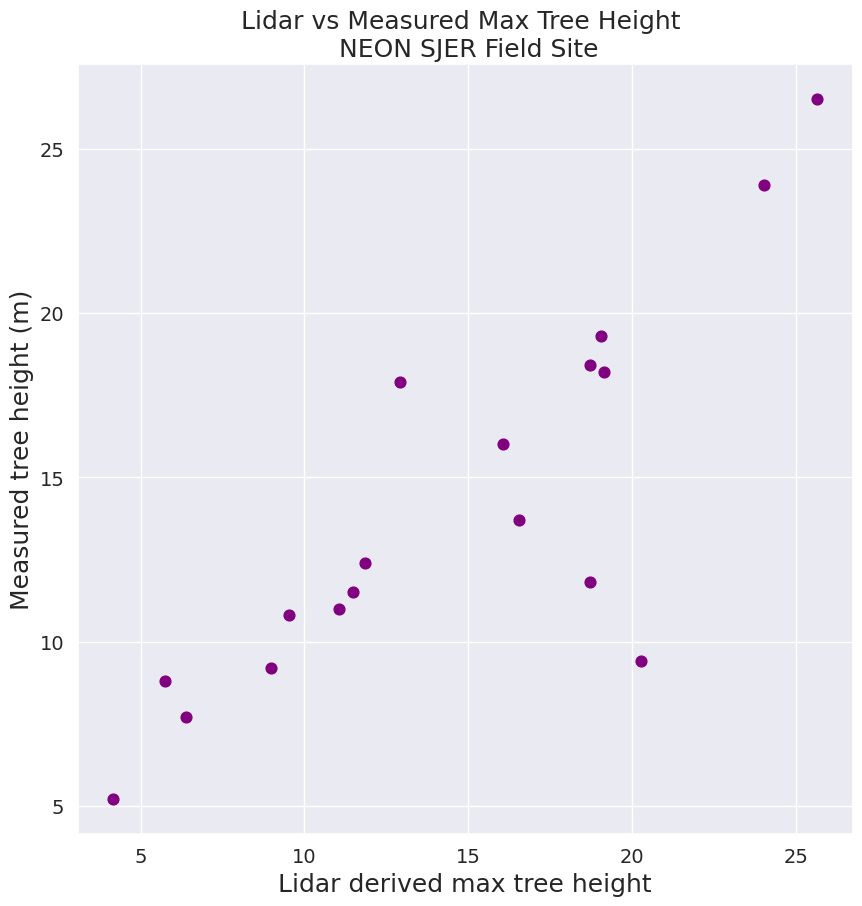

In [11]:
sjer_final_height_df = pd.DataFrame(sjer_final_height)

fig, ax = plt.subplots(figsize=(10,10))

sjer_final_height_df.plot("lidar_max", "insitu_max", kind="scatter", fontsize=14, s=60, color="purple", ax=ax)

ax.set(xlabel="Lidar derived max tree height", ylabel="Measured tree height (m)", title="Lidar vs Measured Max Tree Height \n NEON SJER Field Site")

plt.show()

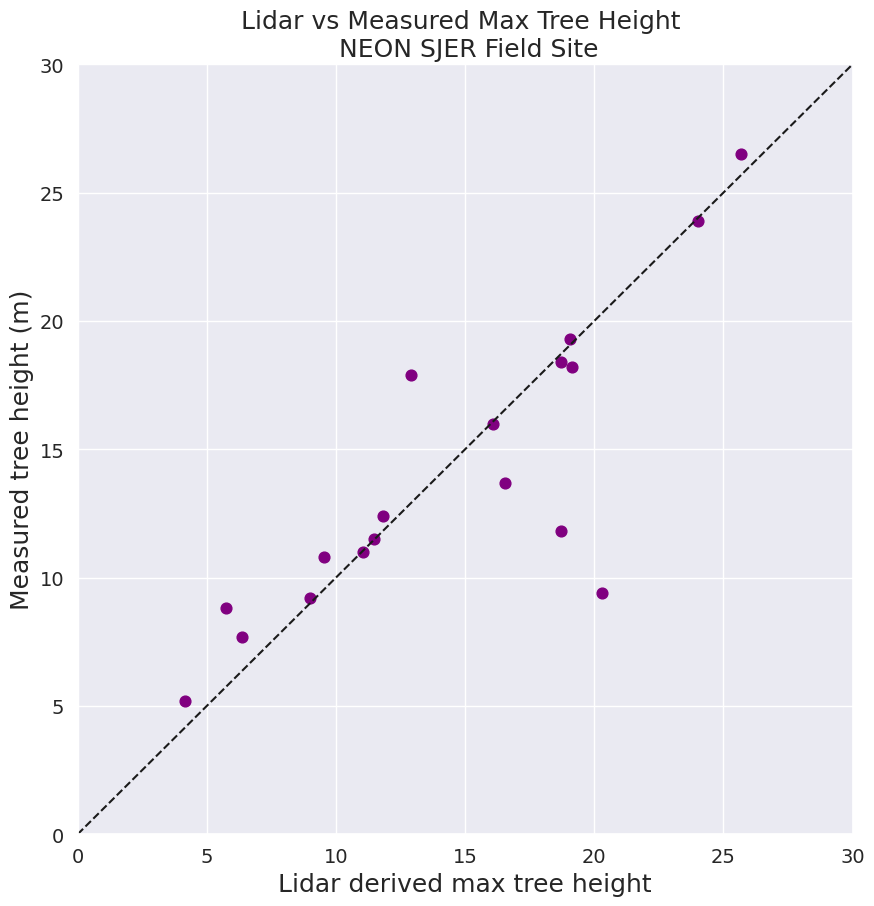

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

sjer_final_height_df.plot("lidar_max", "insitu_max", kind="scatter", fontsize=14, s=60, color="purple", ax=ax)

ax.set(xlabel="Lidar derived max tree height", ylabel="Measured tree height (m)", title="Lidar vs Measured Max Tree Height \n NEON SJER Field Site")

ax.plot((0,1), (0,1), transform=ax.transAxes, ls="--", c="k")

ax.set(xlim=[0,30], ylim=[0,30])

plt.show()

In [13]:
outpath = os.path.join("spatial-vector-lidar", "outputs", "sjer-lidar-insitu-merge.csv")

sjer_final_height_df.to_csv(outpath)

In [14]:
sjer_final_height["geometry"] = sjer_final_height.centroid
sjer_final_height.head()

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max
0,POINT (255852.376 4111567.818),SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161,SJER1068,3.866667,19.3
1,POINT (257406.967 4111298.971),SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443,SJER112,8.221429,23.9
2,POINT (256838.760 4110819.876),SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643,SJER116,8.218750,16.0
3,POINT (256176.947 4108752.026),SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245,SJER117,6.512500,11.0
4,POINT (255968.372 4110476.079),SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17,SJER120,7.600000,8.8


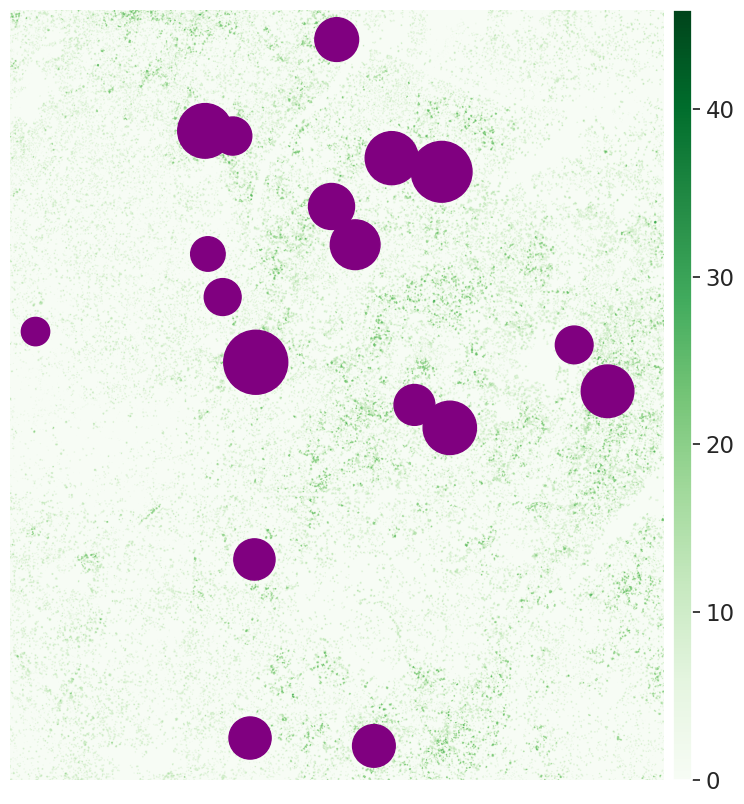

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

ep.plot_bands(sjer_chm_data, cmap="Greens", extent=plotting_extent(sjer_chm_data, sjer_chm_data.rio.transform()), ax=ax, scale=False)

sjer_final_height.centroid.plot(ax=ax, marker="o", markersize=sjer_final_height["insitu_max"] * 80, c="purple")

ax.set_axis_off()

plt.show()

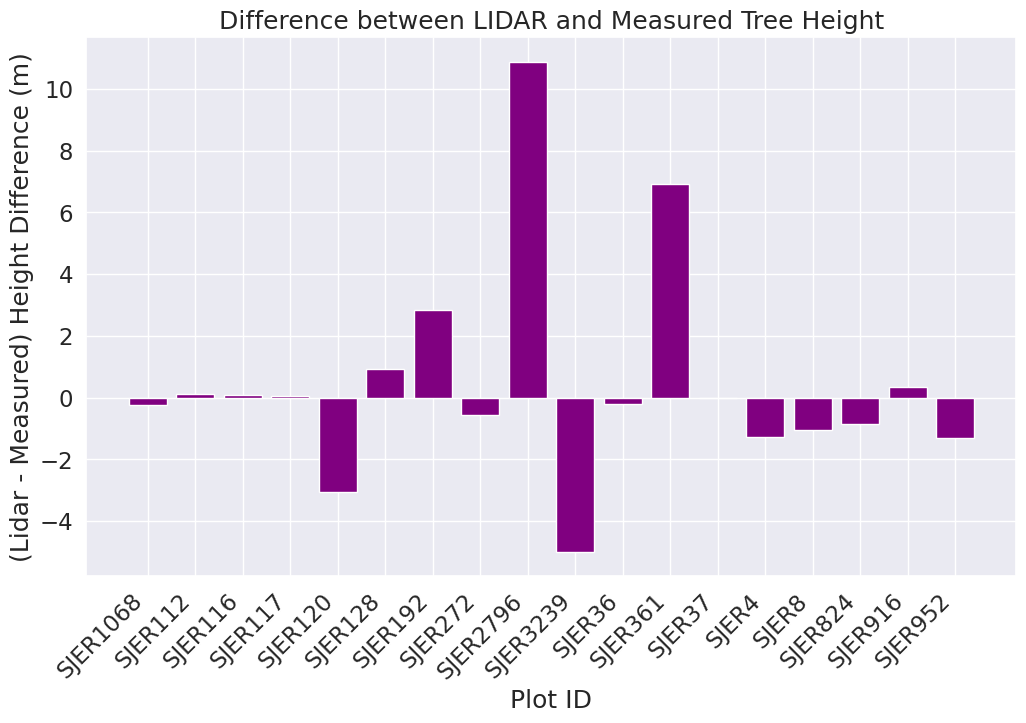

In [16]:
sjer_final_height["lidar_measured"] = sjer_final_height["lidar_max"] - sjer_final_height["insitu_max"]

fig, ax = plt.subplots(figsize=(12,7))

ax.bar(sjer_final_height["plotid"], sjer_final_height["lidar_measured"], color="purple")

ax.set(xlabel="Plot ID", ylabel="(Lidar - Measured) Height Difference (m)", title="Difference between LIDAR and Measured Tree Height")

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

plt.show()